# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [60]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

import seaborn as sns

### Step 2: Read in your data set 

In [27]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [28]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [29]:
# since df_raw.count() only counts rows which are non-NA/NaN
df_raw.shape[0]

#Or you can use this too
len(df_raw.index)

400

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [30]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Putting aside data sampling specific answers, the range of possible GRE values is much greater than the range of possible GPA values.

#### Question 4. Drop data points with missing data


In [39]:
#marking the zero values as missing or NaN
#note: you can use copy() to prevent future possible variable name problems
df_raw[['admit','gre','gpa','prestige']] = df_raw[['admit','gre','gpa','prestige']].replace(0, np.NaN)

#drops rows with missing values
df_raw.dropna(inplace=True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: You can use the df_raw.isnull() function to check for any null values

In [41]:
#to check for any null values left you can do...
print(df_raw.isnull().sum())

#or to check the opposite
#df_raw.notnull().sum()

#just double checking whether the DF changed size
print(df_raw.shape)

admit       0
gre         0
gpa         0
prestige    0
dtype: int64
(126, 4)


#### Question 6. Create box plots for GRE and GPA

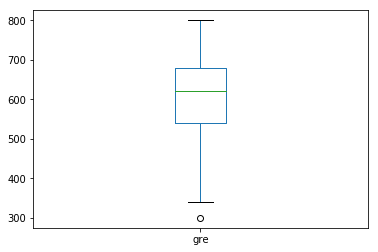

In [46]:
#boxplot 1
df_raw['gre'].plot(kind='box')

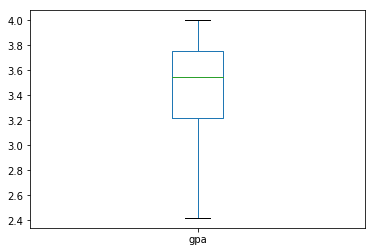

In [48]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The green line is the median.  The edges of the box respectively are the upper & lower quartiles or where 75% & 25% values are.  The black lines at the end are the upper and lower extremes.  Anything outside those lines are outliers.

#### Question 8. Describe each distribution 

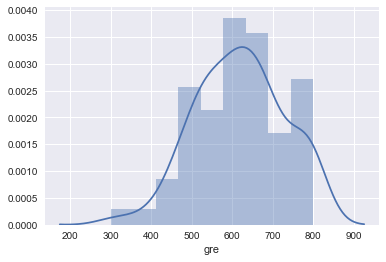

In [56]:
# plot the distribution of each variable 
sns.distplot(df_raw['gre'])

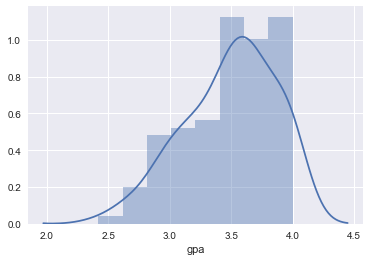

In [57]:
sns.distplot(df_raw['gpa'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

#They don't exactly fit a normal distribution.  Both the GRE & GPA values are slightly skewed left, and are not symmetrical about the mean.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: If the above two distributions are non-normally distributed this may be due to the presence of outliers (ignoring the fact that the data could be drawn from a non-normal process like bimodal, etc).  We can correct for this by doing something like a log-transform of one of the variables that needs corrections.  This transform decreases the magnitude of the effect of extreme values much more than the magnitude of the effect of not-so-extreme values.

#### Question 11. Which of our variables are potentially colinear? 

In [59]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,NaN,NaN,NaN,NaN
gre,NaN,1.000000,0.232765,-0.080485
gpa,NaN,0.232765,1.000000,-0.039360
prestige,NaN,-0.080485,-0.039360,1.000000


#### Question 12. What did you find?

Answer: Besides the trivial answer that each value is exactly correlated with itself, there are no other strong correlations between the variables. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The first thing I would do is check whether the sample of values I have for those variables are normally distributed.  If not, I would need to either remove some outliers, transform the data, or otherwise figure out why the non-normal distribution exists.  Next, I would check the correlation matrix to discover whether any variables are colinear.  This might hint at possible confounding variables or other influence variables.  After that, I would make a scatter plot between the two variables to visualize the shape of the variables against one another.  This would give an idea of whether or not a transformation would be needed.  

#### Question 14. What is your hypothesis? 

Answer: The null hypothesis would be that there exists no association between grad school admission rates and prestige of undergraduate schools.  My hypothesis would be that there does exist an association, namely a positive one.  This might be a direct association, but instead be representative of some underlying variable like student study habits, IQ, etc.  

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [45]:
#choose to drop rows only if all the values in the values in the row are missing
df_raw.dropna(how='all')

#drops just a column that has some missing values
df_raw.dropna(axis=1)

#creates a threshold of minimum number n values you want to have 
df_raw.dropna(thresh=n)

#alternatively, you can fill in missing values
df_raw.fillna(value)

#### 2. Bonus: Log transform the skewed data

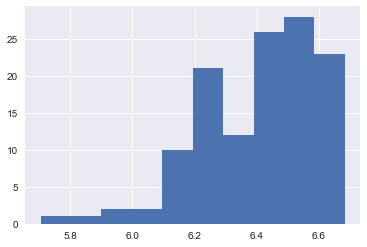

In [63]:
df_raw['gre'].apply(np.log).hist()

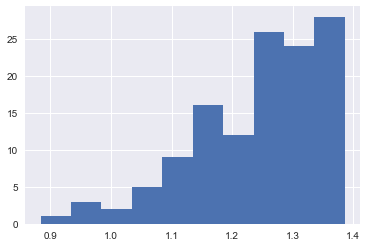

In [64]:
df_raw['gpa'].apply(np.log).hist()

#### 3. Advanced: Impute missing data

In [66]:
#Assuming I impute/replace the missing values with the Mean...
#for instance, I can probably do:
df_raw['gpa'].fillna(df_raw['gpa'].mean(), inplace=True)